In [1]:
%cd ~

/root


In [2]:
import os
import japanize_matplotlib
import matplotlib.pyplot as plt
from wordcloud import WordCloud

%matplotlib inline

In [8]:
from work.wordcloud.config.wordcloud_data_paths import WordcloudDataPaths

In [3]:
import subprocess

cmd = "find / -path */ipaexg.ttf 2> /dev/null | head -1"

IPAEXG_FONT_PATH = (
    subprocess.Popen(
        cmd,
        stdout=subprocess.PIPE,
        stderr=subprocess.PIPE,
        shell=True,
        encoding="utf-8",
    )
    .communicate()[0]
    .strip()
)

IPAEXG_FONT_PATH

'/usr/share/fonts/opentype/ipaexfont-gothic/ipaexg.ttf'

## [Single Word — wordcloud 1.8.1 documentation](https://amueller.github.io/word_cloud/auto_examples/single_word.html)

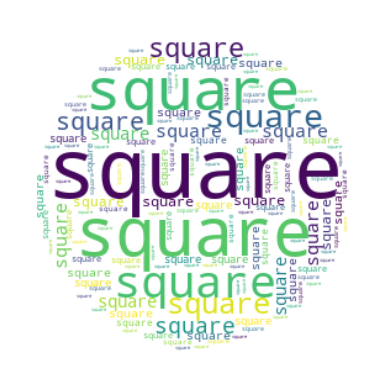

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text = "square"

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)


wc = WordCloud(background_color="white", repeat=True, mask=mask)
wc.generate(text)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

## [Minimal Example — wordcloud 1.8.1 documentation](https://amueller.github.io/word_cloud/auto_examples/simple.html)

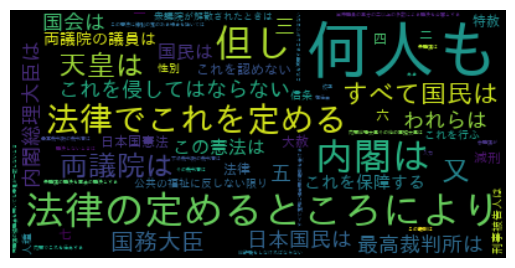

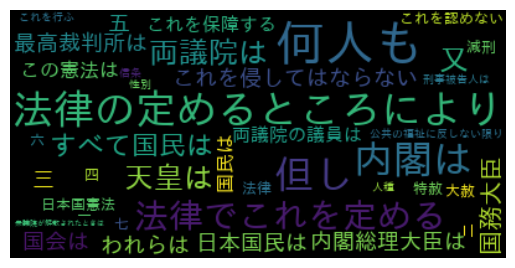

In [14]:
import os

from os import path
from wordcloud import WordCloud

# # get data directory (using getcwd() is needed to support running example in generated IPython notebook)
# d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text.
filepath = WordcloudDataPaths.JAPANESE_CONSTITUTION_PATH
text = open(filepath, encoding='shift_jis').read()

# Generate a word cloud image
wordcloud = WordCloud(font_path=IPAEXG_FONT_PATH).generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40, font_path=IPAEXG_FONT_PATH).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# The pil way (if you don't have matplotlib)
# image = wordcloud.to_image()
# image.show()

In [4]:
def plot_wordcloud(
    text: str,
    width: float = 900,
    height: float = 500,
    stopwords: list[str] = [],
    filepath: str | None = None,
    font_path: str | None = None,
    collocations: bool = False,
    background_color: str = None,
    colormap: str = None,
    figsize: tuple[int] = (6, 4),
) -> None:
    wordcloud = WordCloud(
        width=width,
        height=height,
        stopwords=stopwords,
        font_path=font_path,
        collocations=collocations,
        background_color=background_color,
        colormap=colormap,
    ).generate(text)

    plt.figure(figsize=figsize)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

    if filepath is not None:
        wordcloud.to_file(filepath)

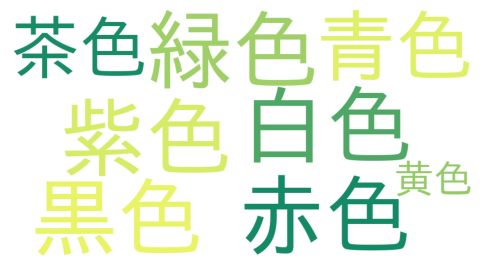

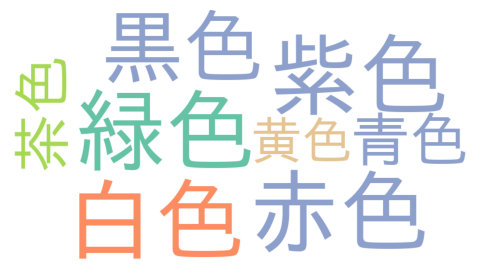

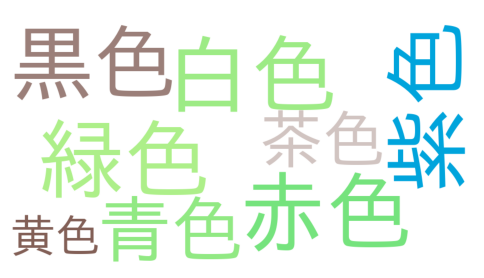

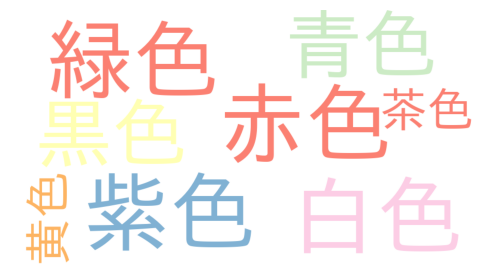

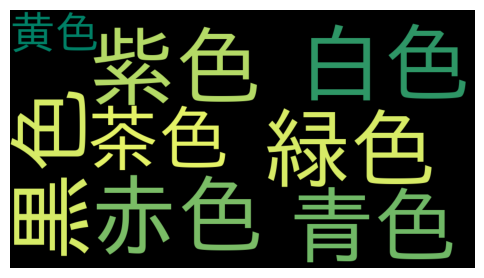

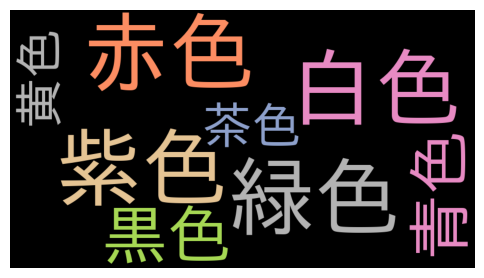

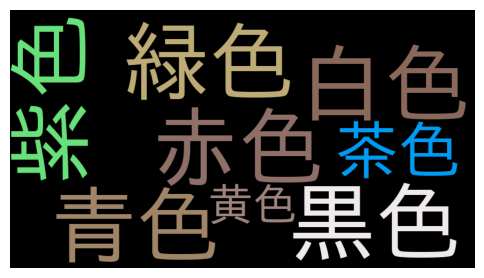

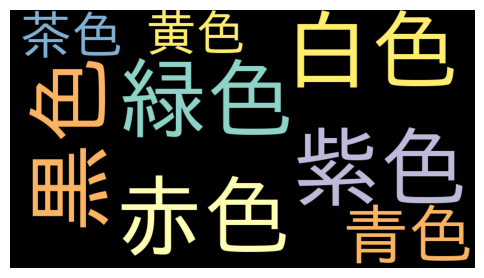

In [5]:
output_dir = "work/wordcloud/output"
os.makedirs(output_dir, exist_ok=True)

text = "緑色 赤色 紫色 白色 黒色 青色 茶色 黄色"
back_col = ["white", "black"]
col_pallete = ["summer", "Set2", "terrain", "Set3"]
for i, bc in enumerate(back_col):
    for cp in col_pallete:
        filename = "0" + str(i) + "_" + bc + "_" + cp + ".png"
        filepath = os.path.join(output_dir, filename)

        plot_wordcloud(
            text=text,
            font_path=IPAEXG_FONT_PATH,
            filepath=filepath,
            background_color=bc,
            colormap=cp,
        )